In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [5]:
name_of_file='OnlineRetail1.csv'
path = '/Users/vladimirp/Desktop/'+ name_of_file

In [6]:
df = pd.read_csv(path,
                 sep=";",
                 skiprows=0,
             engine='python')

print (df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  
0       2010-01

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom


# Data preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
# Feature selection
df=df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12,4.15,12680.0,France


<Axes: >

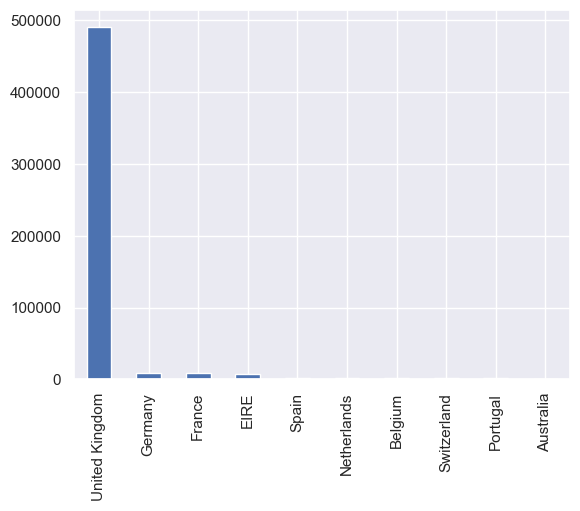

In [10]:
df.Country.value_counts()[:10].plot(kind='bar')

In [11]:
df=df[df.Country=='United Kingdom']
features = ['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']
data_clv = df[features]
data_clv['TotalSales'] = data_clv['Quantity'].multiply(data_clv['UnitPrice'])
print(data_clv.shape)
data_clv.head()

(490300, 6)


,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalSales
0,17850.0,536365,2010-01-12,6,2.55,15.30
1,17850.0,536365,2010-01-12,6,3.39,20.34
2,17850.0,536365,2010-01-12,8,2.75,22.00
3,17850.0,536365,2010-01-12,6,3.39,20.34
4,17850.0,536365,2010-01-12,6,3.39,20.34


In [12]:
data_clv.describe()

,CustomerID,Quantity,UnitPrice,TotalSales
count,356728.000000,490300.000000,490300.000000,490300.000000
mean,15543.795284,8.668831,4.554859,16.657410
std,1594.286219,228.768014,99.837980,396.909392
min,12346.000000,-80995.000000,-11062.060000,-168469.600000
25%,14191.000000,1.000000,1.250000,3.300000
50%,15513.000000,3.000000,2.100000,8.300000
75%,16931.000000,10.000000,4.130000,16.630000
max,18287.000000,80995.000000,38970.000000,168469.600000


In [13]:
data_clv = data_clv[data_clv['TotalSales'] > 0]
data_clv.describe()


,CustomerID,Quantity,UnitPrice,TotalSales
count,349203.000000,479985.000000,479985.000000,479985.000000
mean,15548.384252,9.681357,3.865228,18.754220
std,1594.384044,162.751675,34.861380,282.776668
min,12346.000000,1.000000,0.001000,0.001000
25%,14191.000000,1.000000,1.250000,3.450000
50%,15518.000000,3.000000,2.100000,8.500000
75%,16931.000000,10.000000,4.130000,17.000000
max,18287.000000,80995.000000,13541.330000,168469.600000


In [14]:
pd.DataFrame(zip(data_clv.isnull().sum(), data_clv.isnull().sum()/len(data_clv)), columns=['Count', 'Proportion'], index=data_clv.columns)

,Count,Proportion
CustomerID,130782,0.272471
InvoiceNo,0,0.000000
InvoiceDate,0,0.000000
Quantity,0,0.000000
UnitPrice,0,0.000000
TotalSales,0,0.000000


In [15]:
# Dropping the null values in the CustomerID variable
data_clv = data_clv[pd.notnull(data_clv['CustomerID'])]
pd.DataFrame(zip(data_clv.isnull().sum(), data_clv.isnull().sum()/len(data_clv)), columns=['Count', 'Proportion'], index=data_clv.columns)

,Count,Proportion
CustomerID,0,0.0
InvoiceNo,0,0.0
InvoiceDate,0,0.0
Quantity,0,0.0
UnitPrice,0,0.0
TotalSales,0,0.0


In [16]:
data_clv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   349203 non-null  float64
 1   InvoiceNo    349203 non-null  object 
 2   InvoiceDate  349203 non-null  object 
 3   Quantity     349203 non-null  int64  
 4   UnitPrice    349203 non-null  float64
 5   TotalSales   349203 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 18.6+ MB


In [17]:
data_clv["InvoiceNo"] = pd.to_numeric(data_clv["InvoiceNo"])
from datetime import datetime
data_clv['InvoiceDate'] = pd.to_datetime(data_clv['InvoiceDate'], format="%Y-%m-%d", errors='coerce')
#12/1/2010 8:26

In [18]:
data_clv=data_clv.dropna()

In [19]:
data_clv

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalSales
0,17850.0,536365,2010-01-12,6,2.55,15.30
1,17850.0,536365,2010-01-12,6,3.39,20.34
2,17850.0,536365,2010-01-12,8,2.75,22.00
3,17850.0,536365,2010-01-12,6,3.39,20.34
4,17850.0,536365,2010-01-12,6,3.39,20.34
...,...,...,...,...,...,...
541889,15804.0,581585,2011-09-12,12,1.95,23.40
541890,13113.0,581586,2011-09-12,8,2.95,23.60
541891,13113.0,581586,2011-09-12,24,1.25,30.00
541892,13113.0,581586,2011-09-12,24,8.95,214.80


# CLV Calculation

CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.


Customer Value = Average Order Value * Purchase Frequency

In [20]:
data_group=data_clv.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days, \
                                               'InvoiceNo': lambda num: len(num),\
                                               'Quantity': lambda quant: quant.sum(),\
                                               'TotalSales': lambda price: price.sum()})
data_group.head()
# Change the name of columns
data_group.columns=['num_days','num_transactions','num_units','spent_money']
data_group.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12747.0,426,50,700,2226.18
12748.0,692,2069,11450,13826.84
12749.0,270,167,1307,3518.29
12820.0,0,12,115,210.35
12821.0,0,6,70,92.72


In [21]:
# Average Order Value
data_group['avg_order_value']=data_group['spent_money']/data_group['num_transactions']
data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
12747.0,426,50,700,2226.18,44.523600
12748.0,692,2069,11450,13826.84,6.682861
12749.0,270,167,1307,3518.29,21.067605
12820.0,0,12,115,210.35,17.529167
12821.0,0,6,70,92.72,15.453333


In [22]:
purchase_frequency=sum(data_group['num_transactions'])/data_group.shape[0]

In [23]:
# Retention Rate
ret_rate=data_group[data_group.num_transactions > 1].shape[0]/data_group.shape[0]#Churn Rate
churn_rate=1-ret_rate

In [24]:
purchase_frequency,ret_rate,churn_rate

(54.64835974935496, 0.972723921857722, 0.02727607814227795)

In [25]:
# Profit Margin
#0.01 - interchange rate
data_group['profit_margin']=data_group['spent_money']*0.01
data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
12747.0,426,50,700,2226.18,44.523600,22.2618
12748.0,692,2069,11450,13826.84,6.682861,138.2684
12749.0,270,167,1307,3518.29,21.067605,35.1829
12820.0,0,12,115,210.35,17.529167,2.1035
12821.0,0,6,70,92.72,15.453333,0.9272


In [26]:
# Customer Value
data_group['CLV']=(data_group['avg_order_value']* purchase_frequency) / churn_rate
data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV
CustomerID,,,,,,,
12747.0,426,50,700,2226.18,44.523600,22.2618,89204.235941
12748.0,692,2069,11450,13826.84,6.682861,138.2684,13389.293204
12749.0,270,167,1307,3518.29,21.067605,35.1829,42209.515592
12820.0,0,12,115,210.35,17.529167,2.1035,35120.159178
12821.0,0,6,70,92.72,15.453333,0.9272,30961.170991


In [27]:
Profit_margin =0.01
# Calculating the necessary variables for CLV calculation
Average_sales = round(np.mean(data_group['spent_money']),2)
print(f"Average sales: ${Average_sales}")

Purchase_freq = round(np.mean(data_group['num_transactions']), 2)
print(f"Purchase Frequency: {Purchase_freq}")

Retention_rate = data_group[data_group['num_transactions']>1].shape[0]/data_group.shape[0]
churn = round(1 - Retention_rate, 2)
print(f"Churn: {churn}%")

CLV = round(((Average_sales * Purchase_freq/churn)) * Profit_margin, 2)
print(f"The Customer Lifetime Value (CLV) for each customer is: ${CLV}")

Average sales: $1202.8
Purchase Frequency: 54.65
Churn: 0.03%
The Customer Lifetime Value (CLV) for each customer is: $21911.01


# CLV forecasting

In [28]:
data_clv['month_yr'] = data_clv['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))
data_clv.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalSales,month_yr
0,17850.0,536365,2010-01-12,6,2.55,15.30,Jan-2010
1,17850.0,536365,2010-01-12,6,3.39,20.34,Jan-2010
2,17850.0,536365,2010-01-12,8,2.75,22.00,Jan-2010
3,17850.0,536365,2010-01-12,6,3.39,20.34,Jan-2010
4,17850.0,536365,2010-01-12,6,3.39,20.34,Jan-2010


In [29]:
sales_per_month=data_clv.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalSales',aggfunc='sum',fill_value=0).reset_index()
sales_per_month.head()

month_yr,CustomerID,Apr-2011,Aug-2010,Aug-2011,Dec-2010,Dec-2011,Feb-2010,Feb-2011,Jan-2010,Jan-2011,...,Jun-2011,Mar-2010,Mar-2011,May-2010,May-2011,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011
0,12747.0,675.38,0.00,0.00,0.0,0.00,0.00,0.00,0.00,310.78,...,0.00,0.0,0.00,358.56,442.96,0.00,0.00,0.00,0.0,0.00
1,12748.0,296.83,367.52,1282.01,0.0,537.05,4.25,281.77,4.95,486.60,...,1040.40,0.0,289.55,948.23,1082.65,3222.72,1407.23,672.17,136.2,482.75
2,12749.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1896.13,...,763.06,0.0,0.00,0.00,0.00,0.00,0.00,859.10,0.0,0.00
3,12820.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,210.35,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
4,12821.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,92.72


In [30]:
sales_per_month['CLV']=sales_per_month.iloc[:,2:].sum(axis=1)
sales_per_month.head()

month_yr,CustomerID,Apr-2011,Aug-2010,Aug-2011,Dec-2010,Dec-2011,Feb-2010,Feb-2011,Jan-2010,Jan-2011,...,Mar-2010,Mar-2011,May-2010,May-2011,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011,CLV
0,12747.0,675.38,0.00,0.00,0.0,0.00,0.00,0.00,0.00,310.78,...,0.0,0.00,358.56,442.96,0.00,0.00,0.00,0.0,0.00,1550.80
1,12748.0,296.83,367.52,1282.01,0.0,537.05,4.25,281.77,4.95,486.60,...,0.0,289.55,948.23,1082.65,3222.72,1407.23,672.17,136.2,482.75,13530.01
2,12749.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1896.13,...,0.0,0.00,0.00,0.00,0.00,0.00,859.10,0.0,0.00,3518.29
3,12820.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,210.35
4,12821.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,92.72,92.72


In [31]:
X=sales_per_month[['Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011','Jun-2011','May-2011','Apr-2011','Mar-2011','Feb-2011','Jan-2011']]
y=sales_per_month[['CLV']]

In [32]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [33]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predicted = linreg.predict(X_test)
print(linreg.intercept_)
print(linreg.coef_)

[-13.66186373]
[[1.61853644 0.92609135 0.9991837  1.0009468  1.42680043 1.22895831
  1.16430663 0.90682911 0.276322   1.2618052  1.04407266 0.7769709 ]]


In [34]:
from sklearn import metrics
print("R-Square:",metrics.r2_score(y_test, y_predicted))

R-Square: 0.9561230625562269


In [35]:
print("MAE:",metrics.mean_absolute_error(y_test,y_predicted))


MAE: 186.35719317428178


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [37]:
predictions = rf.predict(X_test)

In [38]:
print("R-Square:",metrics.r2_score(y_test, predictions))

R-Square: 0.8011533702429212
